Гипотезы:
1. Популярность языков, прменяемых в одном стеке, имеет прямую зависимость.
2. Гипотеза Н0: "С начала промышленной революции Индустрия 4.0 (2016 год) средняя скорость роста популярности языка Python не изменится"
   Гипотеза Н1: "С начала промышленной революции Индустрия 4.0 (2016 год) средняя скорость роста популярности языка Python вырастет в 2 раза"

* датой начала Индустрии 4.0 примеме 01.02.2016 (после конференции в Давосе)

Примем уровень значимости a = 0.05
Рассмотрим наиболее популярные языки программирвания: C/C++,C#,Delphi/Pascal,Java,JavaScript,Matlab,Python,R,TypeScript,VBA,Visual Basic
Матрица отражает прямую и обратную популярность языков программирования между собой. Языки используемые в одном стеке 
имеют прямую зависимость, напрмер Python и TypeScript/JavaScript (web-технологии)
Разделим данные на два диапазона по времени, до и после  01.02.2016
Сравним средние значения двух периодов с помощью t-критерия Стьюдента
pvalue = 0.01. 0.01 < 0.05
 Следовательно сре

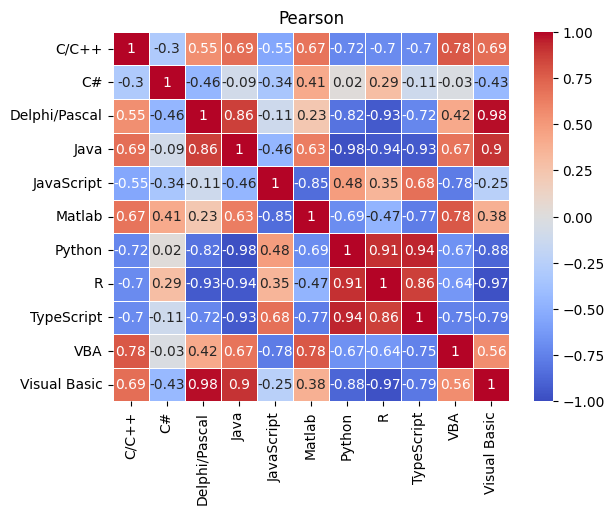

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sc
import seaborn as sbn

# данные
print('''Гипотезы:
1. Популярность языков, прменяемых в одном стеке, имеет прямую зависимость.
2. Гипотеза Н0: "С начала промышленной революции Индустрия 4.0 (2016 год) средняя скорость роста популярности языка Python не изменится"
   Гипотеза Н1: "С начала промышленной революции Индустрия 4.0 (2016 год) средняя скорость роста популярности языка Python вырастет в 2 раза"

* датой начала Индустрии 4.0 примеме 01.02.2016 (после конференции в Давосе)

Примем уровень значимости a = 0.05''')
a = 0.05
df = pd.read_csv('pop_lang.csv', sep=';', decimal=',')
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
lang = ['Date', 'C/C++', 'C#', 'Delphi/Pascal', 'Java', 'JavaScript', 'Matlab',
        'Python', 'R', 'TypeScript', 'VBA', 'Visual Basic']
print('Рассмотрим наиболее популярные языки программирвания: ' + ','.join(lang[1::]))
for i in df.columns:
    if i not in lang:
        df.drop(labels=i, axis=1, inplace=True)
corrP = df.corr(method='pearson', numeric_only=True).round(2)
sbn.heatmap(corrP, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', linewidths=0.5).set_title('Pearson')
print('''Матрица отражает прямую и обратную популярность языков программирования между собой. Языки используемые в одном стеке
имеют прямую зависимость, напрмер Python и TypeScript/JavaScript (web-технологии)''')
dfp = df[['Date', 'Python']].copy()
speed = []
speed.append(dfp['Python'][0])
for i in range(len(dfp)-1):
    speed.append((dfp['Python'][i+1] - dfp['Python'][i]).round(2))
dfp['Speed'] = speed
print('Разделим данные на два диапазона по времени, до и после  01.02.2016')
dfp_prev = dfp[dfp['Date'] < '2016-02-01']
dfp_next = dfp[dfp['Date'] >= '2016-02-01']
print('Сравним средние значения двух периодов с помощью t-критерия Стьюдента')
statistic, pvalue = sc.ttest_ind(a=dfp_prev['Speed'][(len(dfp_prev)-(len(dfp_next)))::], b=dfp_next['Speed'])
if pvalue < a:
    print('pvalue = ' + str(pvalue.round(2)) + '. ' + str(pvalue.round(2)) +
        ' < 0.05\n Следовательно средние значения скорости роста популярности языка Python не равны.\n' +
        'Отклоняем гипотезу H0 и принимаем гипотезу Н1')
else:
    print('pvalue = ' + str(pvalue.round(2)) + '. ' + str(pvalue.round(2)) +
        ' < 0.05\n Следовательно средние значения скорости роста популярности равны\n' +
        'Отклоняем гипотезу H1 и принимаем гипотезу Н1')

print('\nРасчитаем изменение скорости популярности языка Python')
print('Средние значения скорости роста популярности языка Python:\n1. До 01.02.2016 - ' +
      str(dfp_prev['Speed'].mean().round(4)) +
      '\n2. После 01.02.2016 - ' + str(dfp_next['Speed'].mean().round(4)))

print('\nОтношение средних значений скорости изменения популярности языка Python равно: ' +
      str((dfp_next['Speed'].mean()/dfp_prev['Speed'].mean()).round(2)))
print('\nВывод: С начала промышленной революции Индустрия 4.0 (2016 год) средняя скорость роста популярности языка Python вырасла в 2 раза')
plt.show()
